# **Customer Segmentation Analysis**

**1. Loading and exploring the data:**

The first step is to load the dataset and explore its structure. This involves checking the number of records, column names, and data types to understand what kind of information is available. Initial exploration also includes looking at sample rows, identifying categorical and numerical variables, and detecting potential issues such as missing or inconsistent values. A well-structured dataset is crucial for effective analysis.

In [ ]:
import pandas as pd

In [ ]:
data= '/content/ifood_df.csv'
df= pd.read_csv(data)

df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

**2. Data cleaning:**

Handle missing values, remove duplicates, and fix inconsistencies to ensure data accuracy and reliability.

In [ ]:
#to check missing values and duplicates
missing_values = df.isnull().sum().sum()
duplicates = df.duplicated().sum()

In [ ]:
#checking for constant of reduntant columns
constant_columns = [col for col in df.columns if df[col].nunique() == 1]

In [ ]:
#checking for outliers
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
summary_stats = df[numerical_cols].describe()

Summarize key statistics like average spending and purchase frequency to identify overall trends in customer behavior.

In [ ]:
missing_values, duplicates, constant_columns, summary_stats

(0,
 184,
 ['Z_CostContact', 'Z_Revenue'],
               Income      Kidhome     Teenhome      Recency     MntWines  \
 count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
 mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
 std     20713.063826     0.537132     0.544380    28.932111   337.493839   
 min      1730.000000     0.000000     0.000000     0.000000     0.000000   
 25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
 50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
 75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
 max    113734.000000     2.000000     2.000000    99.000000  1493.000000   
 
          MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
 count  2205.000000      2205.000000      2205.000000       2205.000000   
 mean     26.403175       165.312018        37.756463         27.128345   
 std      39.784484       217.784507 

In [ ]:
# Remove duplicates
df = df.drop_duplicates()

In [ ]:
# Drop constant columns
df = df.drop(columns=constant_columns)

In [ ]:
# Replacing negative values in 'MntRegularProds' with 0
df['MntRegularProds'] = df['MntRegularProds'].apply(lambda x: max(x, 0))

In [ ]:
#cleaning results
df.duplicated().sum(), df.shape

(0, (2021, 37))

**3. Feature Engineering:**

Create meaningful features like total spending, purchase frequency, and customer tenure to enhance segmentation.

In [ ]:
# Total Spending across all product categories
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

# Average Monthly Spending
df['Avg_Monthly_Spending'] = df['Total_Spending'] / ((df['Recency'] / 30).replace(0, 1))

# Purchase Frequency
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)

# Alternative Customer Tenure Calculation
if 'Customer_Days' in df.columns:
    df['Customer_Tenure'] = df['Customer_Days'] / 365  # Convert days to years
else:
    df['Customer_Tenure'] = None  # Assign NaN if the column is missing

# Verify new features
df[['Total_Spending', 'Avg_Monthly_Spending', 'Total_Purchases', 'Customer_Tenure']].describe()

,Total_Spending,Avg_Monthly_Spending,Total_Purchases,Customer_Tenure
count,2021.000000,2021.000000,2021.000000,2021.000000
mean,607.711034,1049.450957,12.567541,6.881132
std,602.396167,3608.227877,7.162472,0.554923
min,5.000000,2.678571,0.000000,5.915068
25%,69.000000,53.823529,6.000000,6.402740
50%,397.000000,278.969072,12.000000,6.879452
75%,1048.000000,729.750000,18.000000,7.364384
max,2525.000000,57030.000000,32.000000,7.830137


**4. Customer segmentation using clustering:**

Apply algorithms like K-Means to group customers based on behavior, ensuring optimal clusters using the Elbow Method.

In [ ]:
#standardizing the data
from sklearn.preprocessing import StandardScaler

features = ['Total_Spending', 'Avg_Monthly_Spending', 'Total_Purchases', 'Age']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

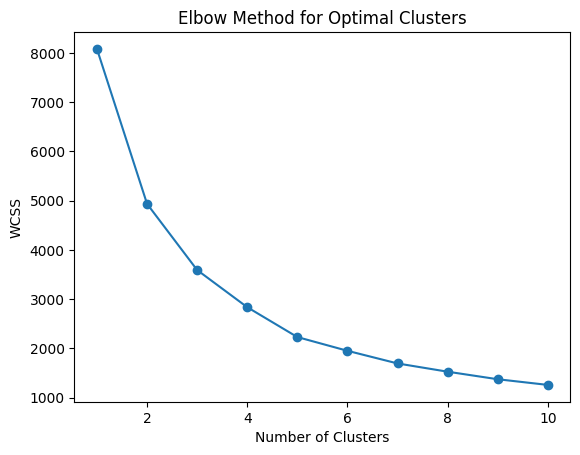

In [ ]:
#finding the right number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [ ]:
#applying k-mean clustering
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

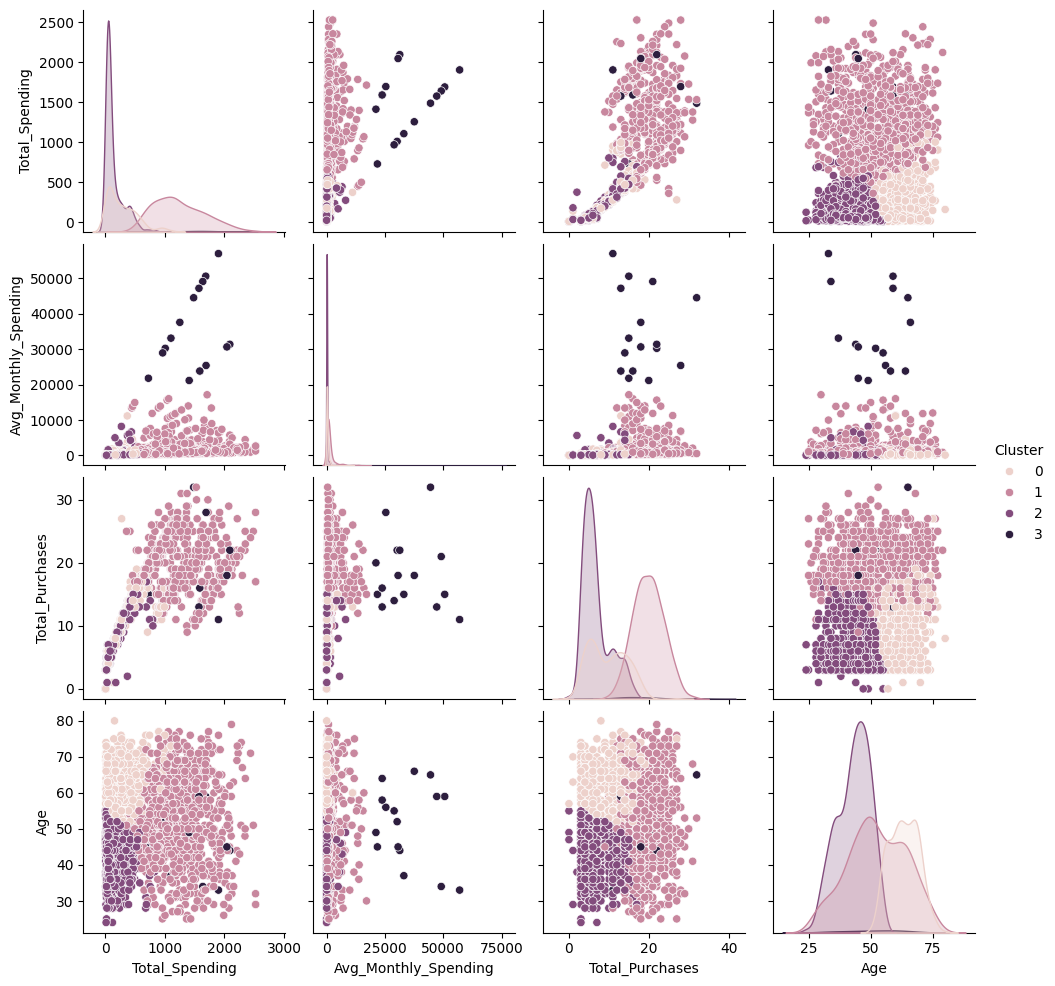

In [ ]:
import seaborn as sns

sns.pairplot(df, hue="Cluster", vars=['Total_Spending', 'Avg_Monthly_Spending', 'Total_Purchases', 'Age'])
plt.show()

**5. Segment visualizations:**

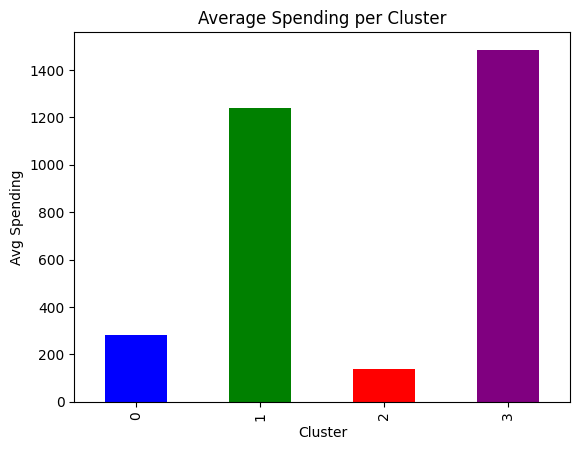

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar Chart: Average Spending by Cluster
df.groupby("Cluster")["Total_Spending"].mean().plot(kind='bar', title="Average Spending per Cluster", color=['blue', 'green', 'red', 'purple'])
plt.ylabel("Avg Spending")
plt.show()

**Observation and Recommendations:**

1. High-Value Clients (Repeated and Loyal Customers)
   These clients shop frequently and spend the most money. Offering exclusive benefits, early access to specials, and tailored recommendations might keep them interested because they place a high value on convenience and quality. They will feel appreciated if there is a rewards-based loyalty program.  


2. Moderate Spenders (Infrequent but Involved Purchasers)
   Although they shop frequently, their expenditure has decreased. Offering them specific discounts on their preferred goods or combining things they often purchase could encourage them to spend more money. Additionally, tailored email advertising can foster their loyalty.  

3. Low-Involvement Clients (Infrequent Purchasers)
   These clients require encouragement to come back. Reminders about cart abandonment, a welcome-back discount, or exclusive deals on first-time purchases can all work well. Rekindling their interest can be achieved through email advertising and social media with attractive offers.  

4. Younger vs. Older Clients: Distinct Approaches, Distinct Preferences
   Engaging younger consumers with mobile-friendly deals, influencer marketing, and social media advertisements will be more effective because they prefer digital-first experiences. It's crucial to tailor outreach according to older clients' purchasing behavior because they might react better to direct communication or catalog advertising.  

The company may develop more intelligent, individualized marketing tactics that increase revenue and customer happiness by having a better grasp of these segments.


